{(0, 0): 0.014051140888567661, (1, 0): 0.010902040737106279, (1, 1): 0.003917635065835404, (2, 0): 0.0099630800488909616, (2, 1): 0.0010667139633535306, (2, 2): 0.00036721402805371542, (2, 3): 0.0019032499315547865, (3, 0): 0.011606737557816476, (3, 1): 0.00087903342435944167, (3, 2): 0.0003642859878883924, (3, 3): 0.00064801726379438464, (3, 4): 0.00036770634056718186, (3, 5): 0.00051544951785236414, (3, 6): 0.00058352703080725467, (3, 7): 0.00088379859509112035}


TypeError: float() argument must be a string or a number, not 'dict'

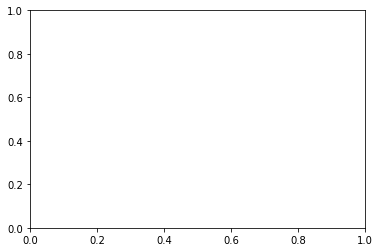

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wavetools as wt

Nr=3
No=3
src=0
epsilon=0.01
# data location
url='../data/InputParameters.txt'
# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')
P=No+1
wv=wt.wavetools(P)
wv.genWVlets()
roots=np.copy(wv.roots)
data=dataframe[src]
details={}
lDetails=np.zeros(P)
rlen=roots.shape[0]
QuantileOnRoots=np.zeros(rlen)
for aNr in range(Nr+1):
    cNri=2**aNr
    for Nri in range(cNri):
        r=np.copy(wv.roots)
        if aNr>0:
            r=wv.rescY(roots,aNr,Nri)
        for i in range(rlen):
            QuantileOnRoots[i]=data.quantile(r[i])
        lDetails=wv.cmpDetails(QuantileOnRoots)
        details[(aNr,Nri)]=sum(abs(lDetails))
    
print(details)
plt.plot(details)
plt.show()